**Import necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pickle


**Load Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()


df = pd.read_csv('Salary.csv')
df.head()

Saving Salary.csv to Salary.csv


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


**Check column names**

In [ ]:
print("Dataset Columns:", df.columns)

Dataset Columns: Index(['YearsExperience', 'Salary'], dtype='object')


**Ensure column names are correctly formatted**

In [ ]:
df.columns = df.columns.str.strip()

**Exploratory Data Analysis**

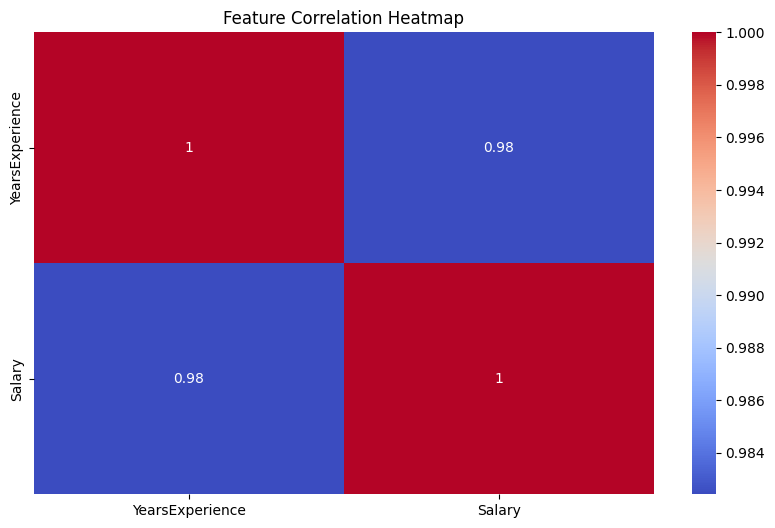

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

**Data Preprocessing**

In [ ]:
df = df.dropna()

**Select valid features based on column names**

In [ ]:
if 'YearsExperience' in df.columns and 'Salary' in df.columns:
    X = df[['YearsExperience']]
    y = df['Salary']
else:
    raise KeyError("Expected columns 'YearsExperience' and 'Salary' not found in dataset. Available columns: ", df.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train Linear Regression with Gradient Descent**

In [ ]:
sgd = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='optimal')
sgd.fit(X_train, y_train)
train_losses = []
test_losses = []

**Tracking loss curve**

In [ ]:
for i in range(1, 100):
    sgd.partial_fit(X_train, y_train)
    train_pred = sgd.predict(X_train)
    test_pred = sgd.predict(X_test)
    train_losses.append(mean_squared_error(y_train, train_pred))
    test_losses.append(mean_squared_error(y_test, test_pred))

**Plot Loss Curve**

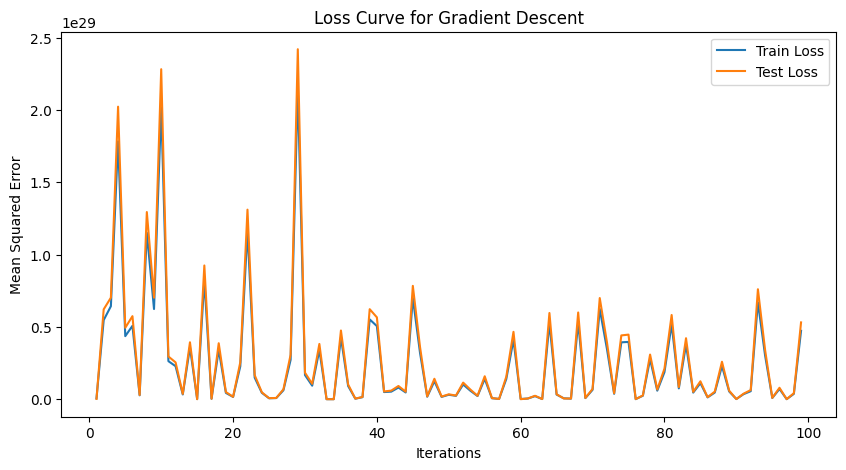

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 100), train_losses, label='Train Loss')
plt.plot(range(1, 100), test_losses, label='Test Loss')
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title("Loss Curve for Gradient Descent")
plt.legend()
plt.show()

**Train and compare other models**

In [ ]:
models = {
    'Linear Regression (GD)': sgd,
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

errors = {}
for name, model in models.items():
    if name != 'Linear Regression (GD)':
        model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    errors[name] = mse

**Save the best model**

In [ ]:
best_model_name = min(errors, key=errors.get)
with open(f'{best_model_name}.pkl', 'wb') as f:
    pickle.dump(models[best_model_name], f)

**Splitting Datasets**

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X


array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [11.2],
       [11.5],
       [12.3],
       [12.9],
       [13.5]])

In [ ]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872, 127345, 126756,
       128765, 135675, 139465])

**Divide The Complete Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**Implement Classifier**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = model.predict(X_test)
predictions

array([120197.8256403 ,  88644.21802942,  74146.61453254, 118492.2252289 ,
        98025.02029212,  72441.01412114,  63913.01206415,  43445.80712736,
        64765.81226984, 112522.623789  , 107405.82255481])

In [ ]:
y_test

array([121872,  91738,  66029, 122391, 101302,  67938,  63218,  37731,
        55794, 112635, 105582])

**Residuals Distribution Visualization**

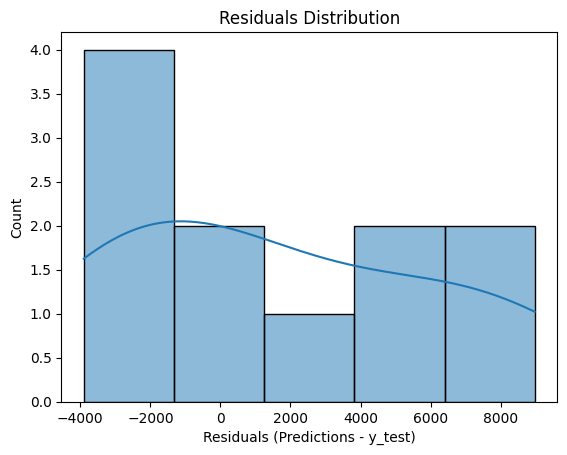

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(predictions - y_test, kde=True)
plt.xlabel('Residuals (Predictions - y_test)')
plt.title('Residuals Distribution')
plt.show()

**Visualizing The Training Data And Regression Line**

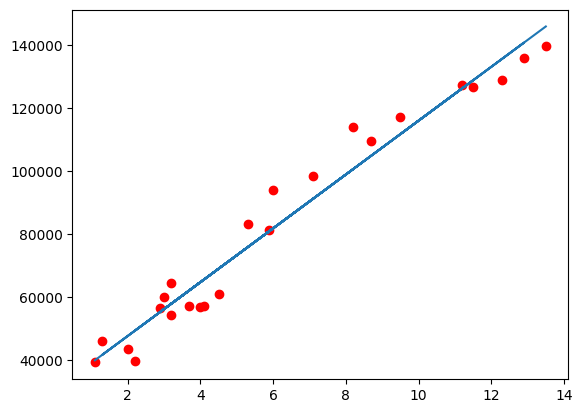

In [ ]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, model.predict(X_train))

**Save the model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

# Example: Assume X and y are your features and target variables
model = LinearRegression()
model.fit(X_train, y_train)

# Save the model using pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

**API code for prediction**

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from fastapi.middleware.cors import CORSMiddleware
import uvicorn
import joblib
import os
import nest_asyncio

app = FastAPI()


app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

class InputData(BaseModel):
    feature: float

@app.post("/predict")
def predict(data: InputData):
    model_path = "C:/Users/kabat/Downloads/model.pkl"


    if not os.path.exists(model_path):
        return {"error": f"Model file '{model_path}' not found."}

    try:

        model = joblib.load(model_path)
    except Exception as e:
        return {"error": f"Error loading the model: {str(e)}"}

    input_data = [[data.feature]]

    try:
        # Predict the result
        prediction = model.predict(input_data)[0]
        return {"prediction": prediction}
    except Exception as e:
        return {"error": f"Error during prediction: {str(e)}"}


if __name__ == "__main__":
    nest_asyncio.apply()
    uvicorn.run(app, host="0.0.0.0", port=8000)

INFO:     Started server process [441]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
